In [ ]:
import pandas as pd # manipulasi dan analisis data
import numpy as np # mengolah dan memanipulasi data dalam bentuk array
import matplotlib.pyplot as plt # Digunakan untuk membuat visualisasi data dalam bentuk grafik, plot, dan diagram
import seaborn as sns # untuk membuat visualisasi data statistik yang menarik dan informatif

import warnings
warnings.filterwarnings('ignore') # untuk mengabaikan peringatan yang mungkin muncul.

import re, string # re =  digunakan untuk pencocokan pola teks. Dalam konteks ini, mungkin digunakan untuk membersihkan atau memanipulasi teks.
                  #  string = menyediakan berbagai konstanta dan fungsi yang berguna untuk manipulasi string.
import nltk # menyediakan berbagai alat dan sumber daya untuk analisis teks, seperti tokenisasi, lemmatisasi, dan berbagai algoritma NLP
from nltk.stem import SnowballStemmer #  mengubah kata-kata menjadi bentuk dasarnya

# skylearn = Library yang menyediakan algoritma pembelajaran mesin dan alat untuk analisis data.
from sklearn.model_selection import train_test_split #  membagi dataset menjadi dua bagian (Training dan test)
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF


# mengimpor beberapa model seperti svm, naivebayes
from sklearn.metrics import classification_report # digunakan untuk menghasilkan laporan klasifikasi yang mendetail, yang berisi berbagai metrik evaluasi seperti presisi (precision), recall, nilai F1, dan dukungan (support) untuk setiap kelas.


In [ ]:
data_news = pd.read_csv('/dataset/fake_news_covid19_dummy.csv') # metode pandas untuk membaca file CSV
data_news.head() # digunakan untuk menampilkan lima baris pertama dari dataframe

,Title,Content,Source,Label
0,Latest Development of COVID-19 Pandemic in Ind...,COVID-19 cases in Indonesia have shown a decli...,CNN Indonesia,real
1,Measures to Prevent COVID-19 in the Work Envir...,Companies are required to implement distancing...,DetikNews,fake
2,Psychological Impact of Self-Isolation Due to ...,Self-isolation during the pandemic can lead to...,Facebook,real
3,Economic Recovery Strategy after COVID-19 Pand...,The government has developed a comprehensive s...,Twitter,real
4,Effectiveness of the COVID-19 Vaccine in Suppr...,Studies have shown that the approved COVID-19 ...,Instagram,real


# Cek Missing Value

In [ ]:
print(data_news.shape) # cek jumlah baris dan kolom
print(50*'-')
print(data_news.info()) # cek missing value dan tipe data

(133, 4)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    133 non-null    object
 1   Content  114 non-null    object
 2   Source   133 non-null    object
 3   Label    133 non-null    object
dtypes: object(4)
memory usage: 4.3+ KB
None


In [ ]:
data_news['Content'] = data_news['Title']+data_news['Content']
data_news = data_news.drop(['Source', 'Title'], axis=1)
data_news.head()

,Content,Label
0,Latest Development of COVID-19 Pandemic in Ind...,real
1,Measures to Prevent COVID-19 in the Work Envir...,fake
2,Psychological Impact of Self-Isolation Due to ...,real
3,Economic Recovery Strategy after COVID-19 Pand...,real
4,Effectiveness of the COVID-19 Vaccine in Suppr...,real


In [ ]:
data_news.isna().sum()

Content    19
Label       0
dtype: int64

In [ ]:
data_news.dropna(inplace=True) #kode untuk menghapus baris yang mengandung nilai yang hilang (NaN) dari dataframe

In [ ]:
data_news.isna().sum() # cek missing value lagi

Content    0
Label      0
dtype: int64

# Visualization

In [ ]:
data_news.shape # cek ulang jumlah baris dan kolom yang telah digabung dan dihapus missing value

(114, 2)

In [ ]:
data_news.dtypes # menampilkan tipe data dari setiap kolom

Content    object
Label      object
dtype: object

In [ ]:
data_news["Label"].value_counts() # menghitung jumlah label real dan fake

Label
real    76
fake    38
Name: count, dtype: int64

In [ ]:
name_var = data_news['Label'].value_counts().index # membaca jumlah nilai yang ada didalam label dan merubahnya menjadi bentuk index (Memudahkan untuk mengelompokkan)
print(name_var)

Index(['real', 'fake'], dtype='object', name='Label')


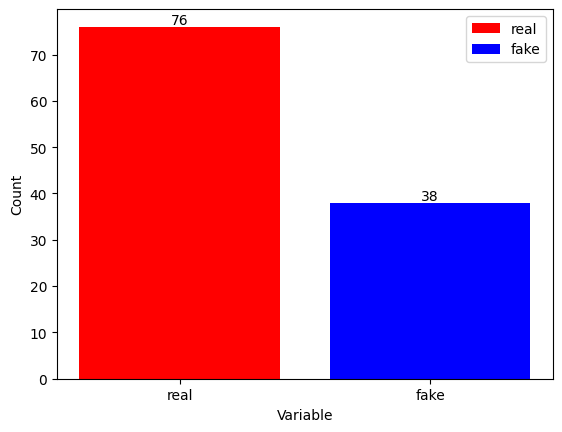

In [ ]:
count_var = data_news['Label'].value_counts()

plt.bar(name_var,count_var, label = name_var, color = ('red','blue'))

for i, value in enumerate(count_var):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Variable')
plt.ylabel('Count')
plt.legend()
plt.show()

# Cleaning Text

In [ ]:
# regular expression
def clean_data(news):
    punc = set(string.punctuation)
    news = ''.join(ch for ch in news if ch not in punc)
    return news

    news = news.lower()
    news = str(text).lower()
    news = re.sub('\[.*?\]', '', news)
    news = re.sub('https?://\S+|www\.\S+', '', news)
    news = re.sub('<.*?>+', '', news)
    news = re.sub('[%s]' % re.escape(string.punctuation), '', news)
    news = re.sub('\n', '', news)
    news = re.sub('\w*\d\w*', '', news)
    news = re.sub('Reuters','',news)
    news = re.sub(r"\d+", "", news)

data_news['Content'] = data_news['Content'].apply(lambda x: clean_data(x))
data_news['Content']

0      Latest Development of COVID19 Pandemic in Indo...
1      Measures to Prevent COVID19 in the Work Enviro...
2      Psychological Impact of SelfIsolation Due to C...
3      Economic Recovery Strategy after COVID19 Pande...
4      Effectiveness of the COVID19 Vaccine in Suppre...
                             ...                        
109    The Role of the Private Sector in Supporting L...
110    Analysis of the Impact of the COVID19 Pandemic...
111    Optimizing the Role of the Disability Communit...
112    The Impact of the COVID19 Pandemic on Changes ...
113    TechnologyBased Health Service Innovation to I...
Name: Content, Length: 114, dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

# initialize SnowballStemmer
stemmer = SnowballStemmer('english')

# Stemming adalah proses mengubah kata-kata menjadi bentuk dasarnya
def stem_text(text):
    # Tokenisasi teks input an menjadi kata-kata individual
    tokens = nltk.word_tokenize(text)

    # Stem setiap token menggunakan SnowballStemmer
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Gabungkan stemmed tokens kembali menjadi single string
    return ' '.join(stemmed_tokens)

# Terapkan stemming ke text data
data_news['Content']=data_news['Content'].apply(stem_text)

data_news.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Content,Label
0,latest develop of covid19 pandem in indonesiac...,real
1,measur to prevent covid19 in the work environm...,fake
2,psycholog impact of selfisol due to covid19sel...,real
3,econom recoveri strategi after covid19 pandemi...,real
4,effect of the covid19 vaccin in suppress the s...,real


# TFIDF & Training Split Data

In [ ]:
X = data_news['Content']
y = data_news['Label']

# test_size = menentukan bahwa data testing akan menjadi 20% dari seluruh dataset, sedangkan data training akan menjadi 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5) # mengubah koleksi dokumen teks menjadi matriks fitur TF-IDF
tfidf_train = tfidf_vectorizer.fit_transform(X_train) # Ini akan menghitung TF-IDF untuk setiap kata dalam X_train, yang merupakan data teks pelatihan.
tfidf_test = tfidf_vectorizer.transform(X_test) #  Ini akan menggunakan vektorizer yang sama yang sudah dipelajari dari data pelatihan (X_train) untuk menghitung vektor TF-IDF untuk data uji (X_test).
                                              #Ini penting karena kita ingin menggunakan kosakata yang sama untuk data pelatihan dan uji agar hasilnya konsisten.

# Handling Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(tfidf_train, y_train)

# Buat DataFrame baru
os = pd.DataFrame(list(zip([x[0] for x in X_train_smote], y_train_smote)), columns=['Content', 'Label'])

# Tampilkan distribusi kelas setelah penerapan SMOTE
os['Label'].value_counts()


Label
real    58
fake    58
Name: count, dtype: int64

Label
real    58
fake    58
Name: count, dtype: int64

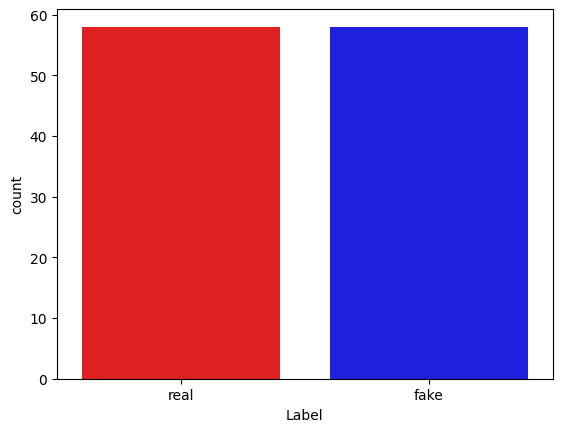

In [ ]:
def create_distribution(dataFile):
    return sns.countplot(x='Label', data=dataFile, palette=['red', 'blue'])

create_distribution(os)

os['Label'].value_counts()

# Metode

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Model Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=100)
lr.fit(tfidf_train, y_train) # # Melatih model klasifikasi  Passive Aggresive menggunakan data training

# Evaluasi
pred_LogisticRegression = lr.predict(tfidf_test) # # Memprediksi label kelas untuk data testing menggunakan model yang sudah dilatih.
print(classification_report(y_test, pred_LogisticRegression, target_names=['Fake', 'True']))

              precision    recall  f1-score   support

        Fake       1.00      0.20      0.33         5
        True       0.82      1.00      0.90        18

    accuracy                           0.83        23
   macro avg       0.91      0.60      0.62        23
weighted avg       0.86      0.83      0.78        23



In [ ]:
accuracy = accuracy_score(y_test,pred_LogisticRegression)
print("Accuracy Logistic Regression Classifier:", accuracy)

Accuracy Logistic Regression Classifier: 0.8260869565217391


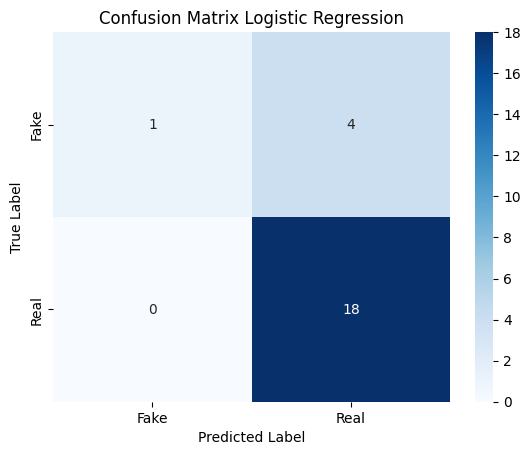

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix untuk Logistic Regression
cm_lr = confusion_matrix(y_test, pred_LogisticRegression)

# Membuat heatmap
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')

# Mengatur label sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Logistic Regression')
plt.xticks(ticks=[0.5, 1.5], labels=['Fake', 'Real'])
plt.yticks(ticks=[0.5, 1.5], labels=['Fake', 'Real'])

plt.show()
